# Project 3: Mental Health

## Notebook: Comparing All Models

This notebook contains two functions for deciding on which models to use. Broadly put these functions are for:
1. Basic Model Comparison
2. Model Comparison with Cross-Validation (K-Fold = 5)

Note that feature selection, handling of nulls, and oversampling is also used in this notebook.

Running the functions takes a long time (about 2-5 minutes each) and the function is called three times (6-15 minutes in total). The computationally expensive fragment is modeling with XGBClassifier (which is ran twice in each function: default and tuned).

Hyperparameter tuning is performed in its labeled section. It's advised to not run that section unless necessary, as it takes a significantly long time (10-60 minutes).

### Imports

In [2]:
# Data Frame and Math Imports
import pandas as pd
import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Imports
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import xgboost as xgb

# Metric Imports
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import imblearn.over_sampling

### Function: Basic Model Comparison

In [3]:
# Define the models evaluation function
def model_comparison(X, y):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation fold
    
    '''
    
    # Perform fit to each machine learning classifier
    log = log_model.fit(X, y)
    dtr = dtr_model.fit(X, y)
    rfc = rfc_model.fit(X, y)
    gnb = gnb_model.fit(X, y)
    bnb = bnb_model.fit(X, y)
    gbm = gbm_model.fit(X, y)
    gbm_tuned = gbm_tuned_model.fit(X, y)
    
    # Perform fit to each machine learning classifier
    log_predict = log_model.predict(X_test)
    dtr_predict = dtr_model.predict(X_test)
    rfc_predict = rfc_model.predict(X_test)
    gnb_predict = gnb_model.predict(X_test)
    bnb_predict = bnb_model.predict(X_test)
    gbm_predict = gbm_model.predict(X_test)
    gbm_tuned_predict = gbm_tuned_model.predict(X_test)
    
    # Create a data frame with the models perfomance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[accuracy_score(y_test, log_predict),
                                                               precision_score(y_test, log_predict),
                                                               recall_score(y_test, log_predict),
                                                               f1_score(y_test, log_predict)],
                                       
                                      'Decision Tree':[accuracy_score(y_test, dtr_predict),
                                                        precision_score(y_test, dtr_predict),
                                                        recall_score(y_test, dtr_predict),
                                                        f1_score(y_test, dtr_predict)],
                                       
                                      'Random Forest':[accuracy_score(y_test, rfc_predict),
                                                        precision_score(y_test, rfc_predict),
                                                        recall_score(y_test, rfc_predict),
                                                        f1_score(y_test, rfc_predict)],
                                       
                                      'Bernoulli Naive Bayes':[accuracy_score(y_test, bnb_predict),
                                                                precision_score(y_test, bnb_predict),
                                                                recall_score(y_test, bnb_predict),
                                                                f1_score(y_test, bnb_predict)],
                                        
                                    'Gaussian Naive Bayes':[accuracy_score(y_test, gnb_predict),
                                                            precision_score(y_test, gnb_predict),
                                                            recall_score(y_test, gnb_predict),
                                                            f1_score(y_test, gnb_predict)],
                                       
                                       'XGradient Boost Classifier':[accuracy_score(y_test, gbm_predict),
                                                                     precision_score(y_test, gbm_predict),
                                                                     recall_score(y_test, gbm_predict),
                                                                     f1_score(y_test, gbm_predict)],
                                       
                               'XGradient Boost Classifier (Tuned)':[accuracy_score(y_test, gbm_tuned_predict),
                                                                     precision_score(y_test, gbm_tuned_predict),
                                                                     recall_score(y_test, gbm_tuned_predict),
                                                                     f1_score(y_test, gbm_tuned_predict)]},
                                       
                                       
                                      
                                      index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Print confusion matrix for each model
    print('Logistic Regression: \n', confusion_matrix(y_test, log_predict))
    print('Decision Tree Classifier: \n', confusion_matrix(y_test, dtr_predict))
    print('Random Forest Classifier: \n', confusion_matrix(y_test, rfc_predict))
    print('Bernoulli Naive Bayes: \n', confusion_matrix(y_test, bnb_predict))
    print('Gaussian Naive Bayes: \n', confusion_matrix(y_test, gnb_predict))
    print('Extreme Gradient Boost: \n', confusion_matrix(y_test, gbm_predict))
    print('Extreme Gradient Boost (Tuned): \n', confusion_matrix(y_test, gbm_tuned_predict))
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

### Function: Model Comparison with K-Folds (5)

In [4]:
# Define the models evaluation function
def model_comparison_crossval(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation fold
    
    '''
    
    # Define dictionary with performance metrics
    scoring = {'accuracy':make_scorer(accuracy_score), 
               'precision':make_scorer(precision_score),
               'recall':make_scorer(recall_score), 
               'f1_score':make_scorer(f1_score)}
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv = folds, scoring = scoring)
    dtr = cross_validate(dtr_model, X, y, cv = folds, scoring = scoring)
    rfc = cross_validate(rfc_model, X, y, cv = folds, scoring = scoring)
    gnb = cross_validate(bnb_model, X, y, cv = folds, scoring = scoring)
    bnb = cross_validate(gnb_model, X, y, cv = folds, scoring = scoring)
    gbm = cross_validate(gbm_model, X, y, cv = folds, scoring = scoring)
    gbm_tuned = cross_validate(gbm_tuned_model, X, y, cv = folds, scoring = scoring)
    
    # Perform cross-validation prediction to each machine learning classifier
    log_predict = cross_val_predict(log_model, X, y, cv = folds)
    dtr_predict = cross_val_predict(dtr_model, X, y, cv = folds)
    rfc_predict = cross_val_predict(rfc_model, X, y, cv = folds)
    bnb_predict = cross_val_predict(bnb_model, X, y, cv = folds)
    gnb_predict = cross_val_predict(gnb_model, X, y, cv = folds)
    gbm_predict = cross_val_predict(gbm_model, X, y, cv = folds)
    gbm_tuned_predict = cross_val_predict(gbm_tuned_model, X, y, cv = folds)

    # Create a data frame with the models perfomance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Bernoulli Naive Bayes':[bnb['test_accuracy'].mean(),
                                                               bnb['test_precision'].mean(),
                                                               bnb['test_recall'].mean(),
                                                               bnb['test_f1_score'].mean()],
                                        
                                    'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                            gnb['test_precision'].mean(),
                                                            gnb['test_recall'].mean(),
                                                            gnb['test_f1_score'].mean()],
                                       
                                       'XGradient Boost Classifier':[gbm['test_accuracy'].mean(),
                                                                     gbm['test_precision'].mean(),
                                                                     gbm['test_recall'].mean(),
                                                                     gbm['test_f1_score'].mean()],
                                       
                               'XGradient Boost Classifier (Tuned)':[gbm_tuned['test_accuracy'].mean(),
                                                                     gbm_tuned['test_precision'].mean(),
                                                                     gbm_tuned['test_recall'].mean(),
                                                                     gbm_tuned['test_f1_score'].mean()]},
                                      
                                      index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

### Features

In [7]:
# Features of interest from the NHANES data set
feature_dict = {'demographic': {'SEQN': 'Respondent_sequence_num',
                                'RIAGENDR': 'Gender',
                                'RIDAGEYR': 'Age_at_screening',
                                'RIDRETH1': 'Race/ethnicity',
                                'DMDEDUC3': 'Education_6-19',
                                'DMDEDUC2': 'Education_20+',
                                'DMDSCHOL': 'Attending_school',
                                'DMDMARTL': 'Marital_status',
                                'INDHHIN2': 'Annual_household_income',
                                'INDFMIN2': 'Annual_family_income',
                                'INDFMPIR': 'Income_family_to_poverty'
                               },
                'depression': {'DPQ010': 'Interest_in_things',           # This section is scaled 
#                               'DPQ020': 'Down_depressed_hopeless',      # 0 - not at all
#                               'DPQ030': 'Trouble/too_much_sleeping',    # 3 - nearly every day
                               'DPQ040': 'Tired/little_energy',          # 7 - refused
                               'DPQ050': 'Poor_appetite/overeating',     # 9 - don't know
#                               'DPQ060': 'Feeling_bad',
                               'DPQ070': 'Trouble_concentrating',
                               'DPQ080': 'Moving/speaking_slow/fast',
#                               'DPQ090': 'Thoughts_of_death',
#                               'DPQ100': 'Difficulty_from_problems'
                              },
                'drug_use': {'DUQ200': 'Marijuana_ever_used',
                             'DUQ211': 'Marijuana_per_month_for_year',
                             'DUQ217': 'Marijuana_frequency',
                             'DUQ230': 'Marijuana_days/month',
                             'DUQ240': 'Cocaine/heroin/meth_ever_used',
                             'DUQ250': 'Cocaine_ever_used',
                             'DUQ272': 'Cocaine_times_used_lifespan',
                             'DUQ280': 'Cocaine_days/month',
                             'DUQ290': 'Heroin_ever_used',
                             'DUQ320': 'Heroin_days/month',
                             'DUQ330': 'Meth_ever_used',
                             'DUQ352': 'Meth_times_used_lifespan',
                             'DUQ360': 'Meth_days/month',
                             'DUQ430': 'Rehab_ever_been'
                            },
                'hospital_util': {'HUQ010': 'General_health_cond',
                                  'HUQ090': 'Mental_health_past_yr'
                                 },
                'sleep': {'SLD010H': 'Sleep_hr/night'
                         },
#                'curr_health_status': {'HSD010': 'General_health_cond',    # ended up not exporting
#                                       'HSQ470': 'Days_bad_phys_health',   # this data set
#                                       'HSQ480': 'Days_bad_mental_health',
#                                       'HSQ490': 'Inactive_days',
#                                       'HSQ496': 'Anxious_days'
#                                       },
                'physical_activity': {'PAQ605': 'Vigorous_work/activity',
                                      'PAQ610': 'Days_vigorous_work',
                                      'PAQ620': 'Moderate_work/activity',
                                      'PAQ625': 'Days_moderate_work',
                                      'PAQ635': 'Walk/bike',
                                      'PAQ640': 'Days_walk/bike',
                                      'PAQ650': 'Vigorous_recreation',
                                      'PAQ655': 'Days_vigorous_recreation',
                                      'PAQ665': 'Moderate_recreation',
                                      'PAQ670': 'Days_moderate_recreation',
                                      'PAD680': 'Mins_sedentary_activity'
                                     },
                'smoking_habits': {'SMQ040': 'Now_smoke_cigarettes'
                                  },
                'weight_height_survey': {'WHD010': 'Self_assess_height',
                                         'WHD020': 'Self_assess_weight',
                                         'WHQ030': 'Self_assess_over/underweight',
                                         'WHQ040': 'Like_to_weigh_more/less',
                                        },
                'drug_prescription': {'RXDDRUG': 'Generic_drug_name',
                                      'RXDDRGID': 'Generic_drug_code',
                                      'RXDDAYS': 'Days_taken_med',
                                      'RXDCOUNT': 'Num_prescription_taken'
                                     }
               }

                # Link for drug codes (1999-2000):
                # https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/RXQ_DRUG.htm

### Make Data Frame

In [8]:
# Import the cleaned master data frame
df_master = pd.read_csv('nhanes_master_dataframe_no_duplicate.csv', index_col = 0)

In [9]:
# Change master dataframe to be 20 and above
df_master = df_master[(df_master['RIDAGEYR'] >= 20)]

# Change master dataframe to be 19 and under
# df_master = df_master[(df_master['RIDAGEYR'] <= 19)]

In [10]:
# Add columns from the dictionary key 'depression' into a new dataframe
df = df_master[feature_dict['depression'].keys()]
df = df.rename(columns=feature_dict['depression'])

In [11]:
# Add additional SPECIFIC FEATURES
df['Ratio_income_to_fam'] = df_master['INDFMPIR']
df['Sleep_hr/night'] = df_master['SLD010H']
df['Mins_sedentary_activity'] = df_master['PAD680']
df['Age_at_screening'] = df_master['RIDAGEYR']
df['Race/ethnicity'] = df_master['RIDRETH1']
df['Num_prescription_taken'] = df_master['RXDCOUNT']
df['Education_20+'] = df_master['DMDEDUC2']
df['Marital_status'] = df_master['DMDMARTL']
df['Exercise'] = df_master['EXERCISE_AT_ALL']
df['BMI'] = df_master['BMI']
df['Smoking_frequency'] = df_master['SMQ040']

df.shape

(23922, 16)

In [12]:
# Add diagnosis column as the first column
diagnosis = df_master['DPQ_CLASS_BINARY']
df.insert(0, 'Diagnosis', diagnosis)
df.shape

(23922, 17)

In [13]:
# Check how many 1's and 0's exist in 'Diagnosis'
df['Diagnosis'].value_counts()

0    23094
1      828
Name: Diagnosis, dtype: int64

In [14]:
df.head(10)

,Diagnosis,Interest_in_things,Tired/little_energy,Poor_appetite/overeating,Trouble_concentrating,Moving/speaking_slow/fast,Ratio_income_to_fam,Sleep_hr/night,Mins_sedentary_activity,Age_at_screening,Race/ethnicity,Num_prescription_taken,Education_20+,Marital_status,Exercise,BMI,Smoking_frequency
0,0,2.0,1.0,1.0,1.0,1.0,1.36,4.0,480.0,34.0,3.0,3.0,3.0,1.0,0,32.277319,3.0
1,1,3.0,3.0,2.0,2.0,3.0,0.69,4.0,240.0,60.0,4.0,6.0,3.0,2.0,0,38.732782,1.0
2,0,0.0,0.0,0.0,0.0,2.0,1.01,4.0,720.0,26.0,1.0,NaN,2.0,1.0,1,33.903330,3.0
3,0,1.0,0.0,0.0,0.0,0.0,1.91,8.0,240.0,49.0,3.0,5.0,4.0,6.0,0,29.754957,1.0
4,0,0.0,0.0,0.0,0.0,0.0,1.27,6.0,60.0,80.0,3.0,1.0,4.0,1.0,1,23.731674,3.0
5,0,0.0,0.0,0.0,0.0,0.0,1.69,9.0,540.0,80.0,3.0,5.0,2.0,2.0,0,25.064740,3.0
6,1,1.0,3.0,0.0,1.0,0.0,2.35,10.0,30.0,42.0,4.0,15.0,2.0,1.0,0,41.363037,NaN
7,0,0.0,0.0,2.0,0.0,0.0,0.41,7.0,9999.0,66.0,1.0,2.0,2.0,1.0,0,28.886246,NaN
8,0,0.0,0.0,0.0,0.0,0.0,5.00,8.0,720.0,45.0,3.0,2.0,5.0,1.0,1,26.628788,NaN
9,0,0.0,0.0,0.0,0.0,0.0,0.09,8.0,30.0,28.0,1.0,NaN,1.0,5.0,1,31.090010,3.0


### Make a List of Features

In [15]:
# Create a list of features by collecting column names (dropping first col, 'Diagnosis')
features = df.drop('Diagnosis', axis = 1)

# Saving feature names for later use; we can call feature_list if needed
feature_list = list(features.columns)

feature_list

['Interest_in_things',
 'Tired/little_energy',
 'Poor_appetite/overeating',
 'Trouble_concentrating',
 'Moving/speaking_slow/fast',
 'Ratio_income_to_fam',
 'Sleep_hr/night',
 'Mins_sedentary_activity',
 'Age_at_screening',
 'Race/ethnicity',
 'Num_prescription_taken',
 'Education_20+',
 'Marital_status',
 'Exercise',
 'BMI',
 'Smoking_frequency']

### Replace Null Values

In [16]:
# We will assign NaN values in the depression survey as 9: don't know
# This follows the line of thought that not filling it out most closely aligns with not knowing how to respond
# (Alternatively we can assign it 7, meaning refuse to answer, but that suggests a firm response)

df.loc[(pd.isna(df['Interest_in_things'])), 'Interest_in_things'] = 99
#df.loc[(pd.isna(df['Down_depressed_hopeless'])), 'Down_depressed_hopeless'] = 99
#df.loc[(pd.isna(df['Trouble/too_much_sleeping'])), 'Trouble/too_much_sleeping'] = 99
df.loc[(pd.isna(df['Tired/little_energy'])), 'Tired/little_energy'] = 99
df.loc[(pd.isna(df['Poor_appetite/overeating'])), 'Poor_appetite/overeating'] = 99
#df.loc[(pd.isna(df['Feeling_bad'])), 'Feeling_bad'] = 99
df.loc[(pd.isna(df['Trouble_concentrating'])), 'Trouble_concentrating'] = 99
df.loc[(pd.isna(df['Moving/speaking_slow/fast'])), 'Moving/speaking_slow/fast'] = 99
#df.loc[(pd.isna(df['Thoughts_of_death'])), 'Thoughts_of_death'] = 99
#df.loc[(pd.isna(df['Difficulty_from_problems'])), 'Difficulty_from_problems'] = 99


df.loc[(pd.isna(df['Smoking_frequency'])), 'Smoking_frequency'] = 99
df.loc[(pd.isna(df['Num_prescription_taken'])), 'Num_prescription_taken'] = 99

In [17]:
df.isnull().sum()

Diagnosis                       0
Interest_in_things              0
Tired/little_energy             0
Poor_appetite/overeating        0
Trouble_concentrating           0
Moving/speaking_slow/fast       0
Ratio_income_to_fam          2052
Sleep_hr/night               9366
Mins_sedentary_activity        31
Age_at_screening                0
Race/ethnicity                  0
Num_prescription_taken          0
Education_20+                   0
Marital_status                  0
Exercise                        0
BMI                             0
Smoking_frequency               0
dtype: int64

In [18]:
# Replace all other columns with median value
df = df.fillna(df.median())
# Drop remaining nulls (which should be none, since we've replaced them with median)
df = df.dropna()

df.head(2)

,Diagnosis,Interest_in_things,Tired/little_energy,Poor_appetite/overeating,Trouble_concentrating,Moving/speaking_slow/fast,Ratio_income_to_fam,Sleep_hr/night,Mins_sedentary_activity,Age_at_screening,Race/ethnicity,Num_prescription_taken,Education_20+,Marital_status,Exercise,BMI,Smoking_frequency
0,0,2.0,1.0,1.0,1.0,1.0,1.36,4.0,480.0,34.0,3.0,3.0,3.0,1.0,0,32.277319,3.0
1,1,3.0,3.0,2.0,2.0,3.0,0.69,4.0,240.0,60.0,4.0,6.0,3.0,2.0,0,38.732782,1.0


### Split Data (X, y, Train, Test, Split)

In [19]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df.iloc[:, 0], 
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

print('Features Shape (X):', X.shape)
print('Labels Shape (y):', y.shape)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Features Shape (X): (23922, 16)
Labels Shape (y): (23922,)
Training Features Shape: (19137, 16)
Training Labels Shape: (19137,)
Testing Features Shape: (4785, 16)
Testing Labels Shape: (4785,)


### Handle Sampling Imbalance: Oversample

In [1]:
# Setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 8, 0 : n_neg}

NameError: name 'np' is not defined

In [21]:
# Randomly oversample positive samples: create 10x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 42) 

X_train_resample, y_train_resample = ROS.fit_sample(X_train, y_train)

### Models to Test in Functions

In [22]:
log_model = LogisticRegression(max_iter = 1000,
                              solver = 'liblinear')
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
bnb_model = BernoulliNB()
gbm_model = xgb.XGBClassifier(objective = "binary:logistic")
gbm_tuned_model = xgb.XGBClassifier(n_estimators = 2700,
                                    max_depth = 1,
                                    objective = "binary:logistic",
                                    learning_rate = 0.1, 
                                    subsample = 1,
                                    min_child_weight = 1,
                                    colsample_bytree = 1,
                                    scale_pos_weight = 18)

### Run Functions

Run the function in the order of:
1. X_train and y_train data set
2. X_train_resample and y_train_resample (6x oversampling of positive class)
3. Cross-validation with K-fold = 5

In [21]:
'''
Ask yourself: is minimizing false positives (not depressed, marked depressed--precision)
              or false negatives (depressed, but not marked depressed--recall) more important?

Answer: it is better to minimize false negatives and hence, a better RECALL score
'''

# Run basic model comparison with no oversampling

model_comparison(X_train, y_train)

Logistic Regression: 
 [[4591   28]
 [ 118   48]]
Decision Tree Classifier: 
 [[4486  133]
 [ 116   50]]
Random Forest Classifier: 
 [[4604   15]
 [ 122   44]]
Bernoulli Naive Bayes: 
 [[4269  350]
 [  63  103]]
Gaussian Naive Bayes: 
 [[4294  325]
 [  34  132]]
Extreme Gradient Boost: 
 [[4583   36]
 [ 113   53]]
Extreme Gradient Boost (Tuned): 
 [[4237  382]
 [  33  133]]


,Logistic Regression,Decision Tree,Random Forest,Bernoulli Naive Bayes,Gaussian Naive Bayes,XGradient Boost Classifier,XGradient Boost Classifier (Tuned),Best Score
Accuracy,0.969488,0.947962,0.971369,0.913689,0.924974,0.968861,0.913271,Random Forest
Precision,0.631579,0.273224,0.745763,0.227373,0.288840,0.595506,0.258252,Random Forest
Recall,0.289157,0.301205,0.265060,0.620482,0.795181,0.319277,0.801205,XGradient Boost Classifier (Tuned)
F1 Score,0.396694,0.286533,0.391111,0.332795,0.423756,0.415686,0.390602,Gaussian Naive Bayes


In [22]:
# Run basic model comparison with oversampling (x6) applied

model_comparison(X_train_resample, y_train_resample)

Logistic Regression: 
 [[4436  183]
 [  51  115]]
Decision Tree Classifier: 
 [[4486  133]
 [ 104   62]]
Random Forest Classifier: 
 [[4589   30]
 [ 112   54]]
Bernoulli Naive Bayes: 
 [[4095  524]
 [  45  121]]
Gaussian Naive Bayes: 
 [[4222  397]
 [  28  138]]
Extreme Gradient Boost: 
 [[4552   67]
 [  99   67]]
Extreme Gradient Boost (Tuned): 
 [[3583 1036]
 [  11  155]]


,Logistic Regression,Decision Tree,Random Forest,Bernoulli Naive Bayes,Gaussian Naive Bayes,XGradient Boost Classifier,XGradient Boost Classifier (Tuned),Best Score
Accuracy,0.951097,0.950470,0.970324,0.881087,0.911181,0.965308,0.781191,Random Forest
Precision,0.385906,0.317949,0.642857,0.187597,0.257944,0.500000,0.130143,Random Forest
Recall,0.692771,0.373494,0.325301,0.728916,0.831325,0.403614,0.933735,XGradient Boost Classifier (Tuned)
F1 Score,0.495690,0.343490,0.432000,0.298397,0.393723,0.446667,0.228445,Logistic Regression


In [23]:
# Run basic model comparison with K-fold = 5

model_comparison_crossval(X_train, y_train, 5)

,Logistic Regression,Decision Tree,Random Forest,Bernoulli Naive Bayes,Gaussian Naive Bayes,XGradient Boost Classifier,XGradient Boost Classifier (Tuned),Best Score
Accuracy,0.968229,0.947588,0.968856,0.923395,0.915713,0.966661,0.915765,Random Forest
Precision,0.595992,0.280015,0.655391,0.272712,0.214001,0.544921,0.256330,Random Forest
Recall,0.259923,0.327785,0.225120,0.726635,0.527136,0.264377,0.753759,XGradient Boost Classifier (Tuned)
F1 Score,0.359387,0.301753,0.332112,0.396504,0.303447,0.354856,0.382527,Bernoulli Naive Bayes


### ROC Curves of Model

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = {'Logistic Regression': LogisticRegression(max_iter = 1000,
                                                         solver = 'liblinear'), 
               'Random Forest Classifier': RandomForestClassifier(),
               'Gaussian Naive Bayes': GaussianNB(),
               'XGBoost Classifier': xgb.XGBClassifier(objective = "binary:logistic"),
               'XGBoost Classifier (Tuned)': xgb.XGBClassifier(n_estimators = 2700,
                                             max_depth = 1,
                                             objective = "binary:logistic",
                                             learning_rate = 0.1, 
                                             subsample = 1,
                                             min_child_weight = 1,
                                             colsample_bytree = 1,
                                             scale_pos_weight = 18)}

# Define a result table as a DataFrame
roc_auc_table = pd.DataFrame(columns = ['Classifiers', 'FPR', 'TPR','AUC'])

# Train the models and record the results
for model_name, model in classifiers.items():
    fit = model.fit(X_train, y_train)
    y_predict = model.predict_proba(X_test)[:,1]
    
    # Check shape--it returns two columns (probability of: 0's in first col and 1's in second col)
    #print(model.predict_proba(X_test).shape)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    
    roc_auc_table = roc_auc_table.append({'Classifiers': model_name,
                                          'FPR': fpr, 
                                          'TPR': tpr, 
                                          'AUC': auc}, ignore_index = True)

# Set name of the classifiers as index labels
roc_auc_table.set_index('Classifiers', inplace = True)

roc_auc_table

,FPR,TPR,AUC
Classifiers,,,
Logistic Regression,"[0.0, 0.0, 0.00043299415457891317, 0.000432994...","[0.0, 0.006024096385542169, 0.0060240963855421...",0.944041
Random Forest Classifier,"[0.0, 0.0, 0.0, 0.0, 0.00021649707728945658, 0...","[0.0, 0.006024096385542169, 0.0180722891566265...",0.935166
Gaussian Naive Bayes,"[0.0, 0.004329941545789132, 0.0043299415457891...","[0.0, 0.0783132530120482, 0.08433734939759036,...",0.941134
XGBoost Classifier,"[0.0, 0.0, 0.0, 0.0006494912318683698, 0.00064...","[0.0, 0.006024096385542169, 0.0361445783132530...",0.921355
XGBoost Classifier (Tuned),"[0.0, 0.00021649707728945658, 0.00021649707728...","[0.0, 0.0, 0.018072289156626505, 0.01807228915...",0.934936


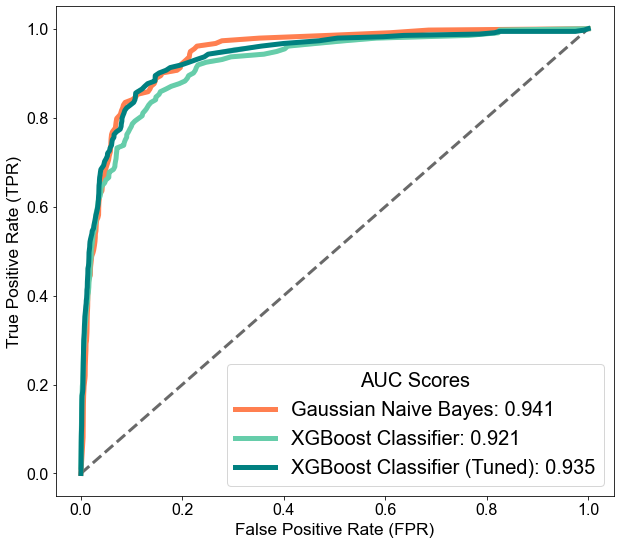

In [25]:
fig1 = plt.figure(figsize=(10,9))
font = {'family': 'arial', 'weight': 'normal'}
plt.rc('font', **font)

# Diagonal Line (Skip Adding Into Legend)
ax1 = sns.lineplot([0,1], [0,1],
             color='dimgrey',
             linewidth = 3,
             label='_nolegend_')

# Gaussian Naive Bayes
sns.lineplot(x = roc_auc_table['FPR'][2],
             y = roc_auc_table['TPR'][2],
             color = "coral",
             linewidth = 5)

# XGBoost Classifier
sns.lineplot(x = roc_auc_table['FPR'][3],
             y = roc_auc_table['TPR'][3],
             color = "mediumaquamarine",
             linewidth = 5)

# XGBoost Classifier (Tuned)
sns.lineplot(x = roc_auc_table['FPR'][4],
             y = roc_auc_table['TPR'][4],
             color = "teal",
             linewidth = 5)

# Dash out unimportant lines
ax1.lines[0].set_linestyle("--")

# Axes properties and labels
ax1.set_xlabel('False Positive Rate (FPR)', fontdict=font, fontsize='xx-large')
ax1.set_ylabel('True Positive Rate (TPR)', fontdict=font, fontsize='xx-large')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Legend
plt.legend(['Gaussian Naive Bayes: ' + format(roc_auc_table['AUC'][2], '.3f'),
            'XGBoost Classifier: ' + format(roc_auc_table['AUC'][3], '.3f'),
            'XGBoost Classifier (Tuned): ' + format(roc_auc_table['AUC'][4], '.3f')],
            title = 'AUC Scores',
            title_fontsize = 20,
            fontsize = 20)

plt.savefig('images/ROC_models.png', bbox_inches = 'tight', dpi = 300)

### Model Selections: XGradient Boost Classifier (and Gaussian Naive Bayes)

At first glance, it looks like Gaussian Naive Bayes is the best-suited for this classification problem. This is the top pick for the best model from a naive perspective (hehe), but there's little-to-no tuning involved. XGradient Boost Classifier has been gaining traction as a good model and with personal interest in this classifier, I will move forward with tuning ths model. **Move forward with tuning XGradient Boost Classifier.**

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

gbm_tuning = xgb.XGBClassifier(n_estimators = 2700,
                               max_depth = 1,
                               objective = "binary:logistic",
                               learning_rate = 0.1, 
                               subsample = 1,
                               min_child_weight = 1,
                               colsample_bytree = 1,
                               scale_pos_weight = 18)

eval_set=[(X_train, y_train), (X_val, y_val)] #tracking train/validation error as we go

fit_model = gbm_tuning.fit(X_train, y_train, 
                          eval_set = eval_set,
                          eval_metric = 'rmse',
                          early_stopping_rounds = 100,
                          verbose=True)                      #gives output log as below

[0]	validation_0-rmse:0.47500	validation_1-rmse:0.47538
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.45317	validation_1-rmse:0.45393
[2]	validation_0-rmse:0.43370	validation_1-rmse:0.43460
[3]	validation_0-rmse:0.41717	validation_1-rmse:0.41831
[4]	validation_0-rmse:0.40213	validation_1-rmse:0.40338
[5]	validation_0-rmse:0.38815	validation_1-rmse:0.38970
[6]	validation_0-rmse:0.37589	validation_1-rmse:0.37767
[7]	validation_0-rmse:0.36536	validation_1-rmse:0.36723
[8]	validation_0-rmse:0.35634	validation_1-rmse:0.35838
[9]	validation_0-rmse:0.34782	validation_1-rmse:0.35010
[10]	validation_0-rmse:0.33973	validation_1-rmse:0.34193
[11]	validation_0-rmse:0.33250	validation_1-rmse:0.33506
[12]	validation_0-rmse:0.32515	validation_1-rmse:0.32777
[13]	validation_0-rmse:0.31925	validation_1-rmse:0.32212
[14]	validation_0-rmse:0.31494	validation_1-rmse:0.3

[141]	validation_0-rmse:0.25625	validation_1-rmse:0.26226
[142]	validation_0-rmse:0.25623	validation_1-rmse:0.26222
[143]	validation_0-rmse:0.25617	validation_1-rmse:0.26220
[144]	validation_0-rmse:0.25620	validation_1-rmse:0.26225
[145]	validation_0-rmse:0.25609	validation_1-rmse:0.26215
[146]	validation_0-rmse:0.25600	validation_1-rmse:0.26214
[147]	validation_0-rmse:0.25595	validation_1-rmse:0.26211
[148]	validation_0-rmse:0.25594	validation_1-rmse:0.26217
[149]	validation_0-rmse:0.25587	validation_1-rmse:0.26211
[150]	validation_0-rmse:0.25583	validation_1-rmse:0.26206
[151]	validation_0-rmse:0.25604	validation_1-rmse:0.26228
[152]	validation_0-rmse:0.25602	validation_1-rmse:0.26231
[153]	validation_0-rmse:0.25603	validation_1-rmse:0.26233
[154]	validation_0-rmse:0.25602	validation_1-rmse:0.26235
[155]	validation_0-rmse:0.25595	validation_1-rmse:0.26225
[156]	validation_0-rmse:0.25590	validation_1-rmse:0.26223
[157]	validation_0-rmse:0.25586	validation_1-rmse:0.26218
[158]	validati

[283]	validation_0-rmse:0.25416	validation_1-rmse:0.26118
[284]	validation_0-rmse:0.25421	validation_1-rmse:0.26122
[285]	validation_0-rmse:0.25418	validation_1-rmse:0.26120
[286]	validation_0-rmse:0.25416	validation_1-rmse:0.26120
[287]	validation_0-rmse:0.25414	validation_1-rmse:0.26121
[288]	validation_0-rmse:0.25412	validation_1-rmse:0.26116
[289]	validation_0-rmse:0.25408	validation_1-rmse:0.26117
[290]	validation_0-rmse:0.25407	validation_1-rmse:0.26118
[291]	validation_0-rmse:0.25401	validation_1-rmse:0.26113
[292]	validation_0-rmse:0.25401	validation_1-rmse:0.26116
[293]	validation_0-rmse:0.25399	validation_1-rmse:0.26116
[294]	validation_0-rmse:0.25396	validation_1-rmse:0.26118
[295]	validation_0-rmse:0.25395	validation_1-rmse:0.26120
[296]	validation_0-rmse:0.25393	validation_1-rmse:0.26115
[297]	validation_0-rmse:0.25392	validation_1-rmse:0.26116
[298]	validation_0-rmse:0.25397	validation_1-rmse:0.26117
[299]	validation_0-rmse:0.25398	validation_1-rmse:0.26123
[300]	validati

[425]	validation_0-rmse:0.25328	validation_1-rmse:0.26114
[426]	validation_0-rmse:0.25331	validation_1-rmse:0.26119
[427]	validation_0-rmse:0.25333	validation_1-rmse:0.26121
[428]	validation_0-rmse:0.25331	validation_1-rmse:0.26118
[429]	validation_0-rmse:0.25330	validation_1-rmse:0.26117
[430]	validation_0-rmse:0.25329	validation_1-rmse:0.26117
[431]	validation_0-rmse:0.25328	validation_1-rmse:0.26114
[432]	validation_0-rmse:0.25327	validation_1-rmse:0.26116
[433]	validation_0-rmse:0.25326	validation_1-rmse:0.26117
[434]	validation_0-rmse:0.25325	validation_1-rmse:0.26116
Stopping. Best iteration:
[334]	validation_0-rmse:0.25378	validation_1-rmse:0.26110



### Feature Importance

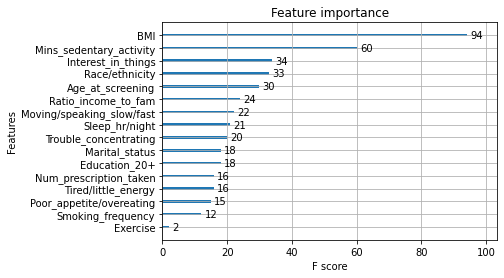

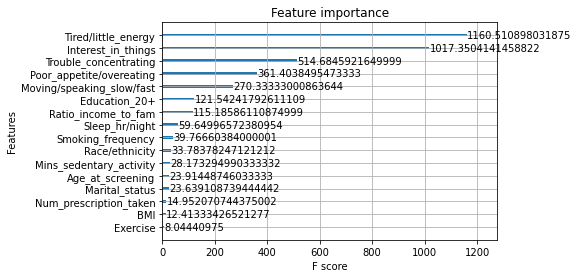

In [26]:
# most common scoring methods are frequency
# (default, just calculates the # of total tree splits the feature is used in)
xgb.plot_importance(gbm_tuning)

# gain (probably better, calculates cumulative information gain from tree splits done on that feature)
xgb.plot_importance(gbm_tuning, importance_type = 'gain')

In [27]:
gbm_tuning.get_booster().get_score(importance_type = 'weight') #extract raw frequency scores

{'Interest_in_things': 34,
 'Tired/little_energy': 16,
 'Trouble_concentrating': 20,
 'Poor_appetite/overeating': 15,
 'Moving/speaking_slow/fast': 22,
 'Ratio_income_to_fam': 24,
 'Education_20+': 18,
 'Sleep_hr/night': 21,
 'Race/ethnicity': 33,
 'Mins_sedentary_activity': 60,
 'Smoking_frequency': 12,
 'Age_at_screening': 30,
 'Marital_status': 18,
 'Num_prescription_taken': 16,
 'BMI': 94,
 'Exercise': 2}

In [28]:
gbm_tuning.get_booster().get_score(importance_type = 'gain') #extract raw gain scores

{'Interest_in_things': 1017.3504141458822,
 'Tired/little_energy': 1160.510898031875,
 'Trouble_concentrating': 514.6845921649999,
 'Poor_appetite/overeating': 361.4038495473333,
 'Moving/speaking_slow/fast': 270.33333000863644,
 'Ratio_income_to_fam': 115.18586110874999,
 'Education_20+': 121.54241792611109,
 'Sleep_hr/night': 59.64996572380954,
 'Race/ethnicity': 33.78378247121212,
 'Mins_sedentary_activity': 28.173294990333332,
 'Smoking_frequency': 39.76660384000001,
 'Age_at_screening': 23.91448746033333,
 'Marital_status': 23.639108739444442,
 'Num_prescription_taken': 14.952070744375002,
 'BMI': 12.41333426521277,
 'Exercise': 8.04440975}

In [29]:
# Create a sorted dataframe (by 'gain') for plotting purposes
feature_importance = gbm_tuning.get_booster().get_score(importance_type = 'gain')
df_importance = pd.DataFrame.from_dict(feature_importance, orient = 'index')
df_importance.columns = ['F_Score']
df_importance = df_importance.sort_values(by = 'F_Score', ascending = False).reset_index()
df_importance.columns = ['Feature', 'F_Score']

# Rename each feature for aesthetically-pleasing plot labels
df_importance.loc[(df_importance.Feature=='Interest_in_things'), 'Feature'] = 'General Interest'
df_importance.loc[(df_importance.Feature=='Tired/little_energy'), 'Feature'] = 'Tiredness/Energy'
df_importance.loc[(df_importance.Feature=='Trouble_concentrating'), 'Feature'] = 'Trouble Concentrating'
df_importance.loc[(df_importance.Feature=='Sleep_hr/night'), 'Feature'] = 'Hours Sleeping'
df_importance.loc[(df_importance.Feature=='Moving/speaking_slow/fast'), 'Feature'] = 'Speech Pace'
df_importance.loc[(df_importance.Feature=='Poor_appetite/overeating'), 'Feature'] = 'Appetite Problems'
df_importance.loc[(df_importance.Feature=='General_good_health'), 'Feature'] = 'Self-Assessment of Health'
df_importance.loc[(df_importance.Feature=='Education_20+'), 'Feature'] = 'Education Level'
df_importance.loc[(df_importance.Feature=='Ratio_income_to_fam'), 'Feature'] = 'Normalized Household Income'
df_importance.loc[(df_importance.Feature=='Mins_sedentary_activity'), 'Feature'] = 'Sedentary Time'
df_importance.loc[(df_importance.Feature=='Race/ethnicity'), 'Feature'] = 'Race/Ethnicity'
df_importance.loc[(df_importance.Feature=='Marital_status'), 'Feature'] = 'Marital Status'
df_importance.loc[(df_importance.Feature=='Age_at_screening'), 'Feature'] = 'Age'
df_importance.loc[(df_importance.Feature=='Num_prescription_taken'), 'Feature'] = 'Qty Medical Prescriptions'
df_importance.loc[(df_importance.Feature=='Smoking_frequency'), 'Feature'] = 'Smoking Frequency'
df_importance.loc[(df_importance.Feature=='BMI'), 'Feature'] = 'Body Mass Index (BMI)'

df_importance

,Feature,F_Score
0,Tiredness/Energy,1160.510898
1,General Interest,1017.350414
2,Trouble Concentrating,514.684592
3,Appetite Problems,361.403850
4,Speech Pace,270.333330
5,Education Level,121.542418
6,Normalized Household Income,115.185861
7,Hours Sleeping,59.649966
8,Smoking Frequency,39.766604
9,Race/Ethnicity,33.783782


In [30]:
# Export feature importance (dataframe above) as csv
df_importance.to_csv('images/xgboost_feature_importance.txt', header=None, index=None, sep=',', mode='a')

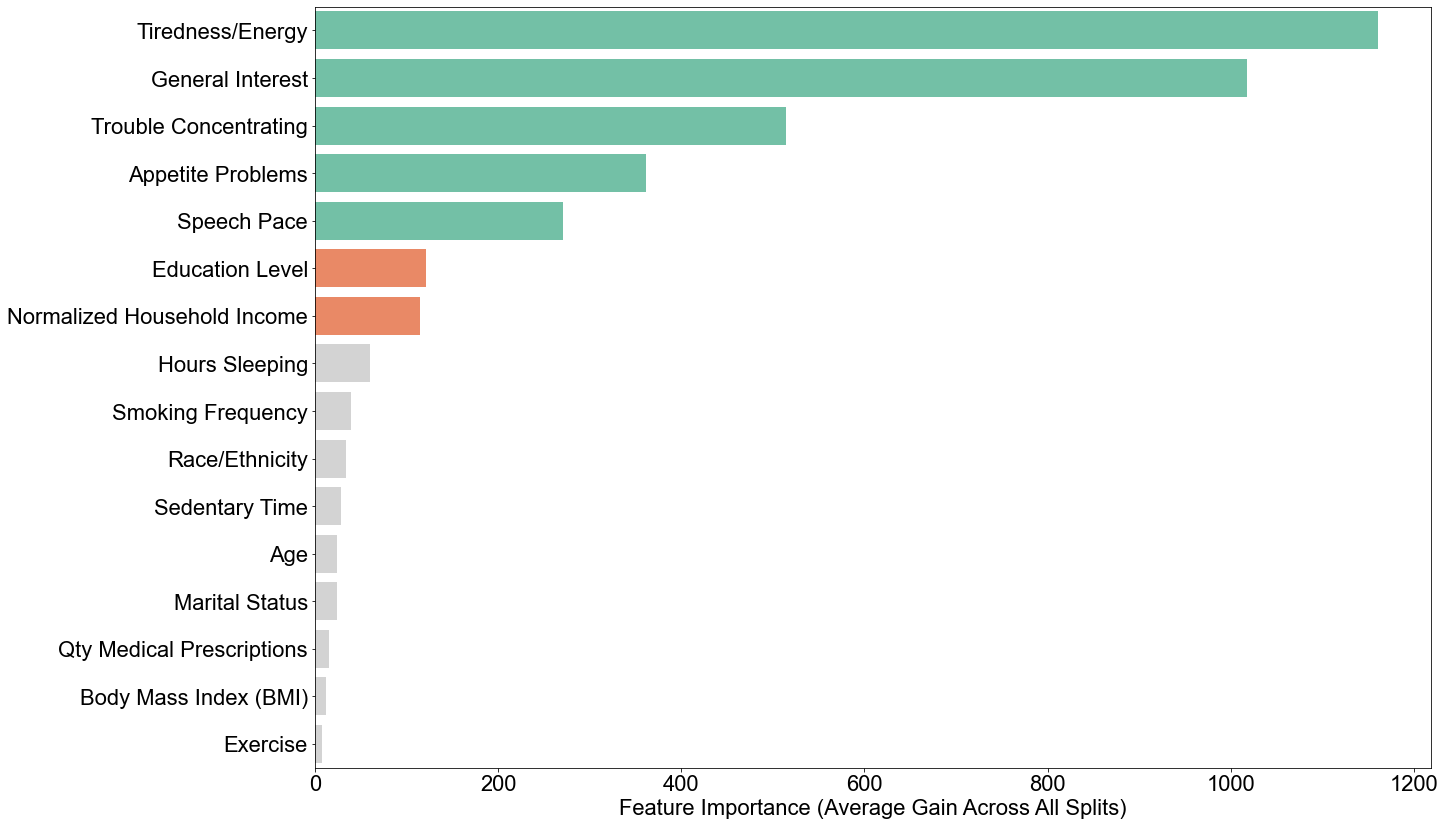

In [31]:
fig2 = plt.figure(figsize=(20,14))
font = {'family': 'arial', 'weight': 'normal'}
plt.rc('font', **font)
'''
Make this figure POP out colors during the presentation.
Start with a bunch of greys, then pop out depression survey, finally other interesing features.
'''


# Set depression survey questions in the same color
color_list = ['lightgrey']
color_list = ['mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine',\
              'lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey',\
              'lightgrey','lightgrey','lightgrey', 'lightgrey', 'lightgrey']
color_list = ['mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine',\
              'coral','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey',\
              'lightgrey','lightgrey','lightgrey', 'lightgrey', 'lightgrey']
color_list = ['mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine',\
              'coral','#ffb19a','lightgrey','lightgrey','lightgrey','lightgrey',\
              'lightgrey','lightgrey','lightgrey', 'lightgrey', 'lightgrey']
color_list = ['mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine',\
              'coral','coral','lightgrey','lightgrey','lightgrey','lightgrey',\
              'lightgrey','lightgrey','lightgrey', 'lightgrey', 'lightgrey']

# Diagonal Line (Skip Adding Into Legend)
ax2 = sns.barplot(x = df_importance['F_Score'],
                  y = df_importance['Feature'],
                  palette = color_list)

# Axes properties and labels
ax2.set_xlabel('Feature Importance (Average Gain Across All Splits)', fontdict=font, fontsize = 22)
ax2.set_ylabel('', fontdict=font, fontsize='xx-large')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.savefig('images/feature_importance_5.png', bbox_inches = 'tight', dpi = 300)

### XGradient Boost Classifier: Hyperparameter Tuning

In [32]:
'''
This is a setup for hyperparameter tuning.
It uses a random grid search to find the 'best' hyperparamaters to use for random forest classification.
'''

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 11000, num = 101)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]

scale_pos_weight = [int(x) for x in np.linspace(1, 20, num = 20)]

colsample_bytree = [round(x, 1) for x in np.linspace(0.2, 2.0, num = 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'scale_pos_weight': scale_pos_weight,
               'colsample_bytree': colsample_bytree}

print(random_grid)

{'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000], 'max_depth': [1, 2, 3, 4, 5], 'scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]}


In [33]:
'''
# This runs the hyperparameter tuning for random forest classification.
# It takes about 30 minutes to run.

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 150 different combinations, and use all available cores

scorers = {'precision_score': make_scorer(precision_score),
           'recall_score': make_scorer(recall_score),
           'accuracy_score': make_scorer(accuracy_score)}

gbm_search = RandomizedSearchCV(estimator = gbm_model,
                                param_distributions = random_grid,
                                n_iter = 150, cv = 5, verbose = 2,
                                random_state = 42,
                                scoring = scorers, #Specifically optimizes recall
                                refit = 'recall_score',
                                n_jobs = -1)
                                     
# Fit the random search model
gbm_search.fit(X_train, y_train)

'''

"\n# This runs the hyperparameter tuning for random forest classification.\n# It takes about 30 minutes to run.\n\n# Use the random grid to search for best hyperparameters\n\n# Random search of parameters, using 3 fold cross validation, \n# search across 150 different combinations, and use all available cores\n\nscorers = {'precision_score': make_scorer(precision_score),\n           'recall_score': make_scorer(recall_score),\n           'accuracy_score': make_scorer(accuracy_score)}\n\ngbm_search = RandomizedSearchCV(estimator = gbm_model,\n                                param_distributions = random_grid,\n                                n_iter = 150, cv = 5, verbose = 2,\n                                random_state = 42,\n                                scoring = scorers, #Specifically optimizes recall\n                                refit = 'recall_score',\n                                n_jobs = -1)\n                                     \n# Fit the random search model\ngbm_searc

In [1]:
# Run this after the above cell is run to collect best parameters
#gbm_search.best_params_

NameError: name 'gbm_search' is not defined

### Make Website App with Flask

In [35]:
import pickle as pkl

XGBoost only accepts unlabeled column named which so happen to be equivalent to f0, f1, ..., f15. To keep track of the column names I will explicitly label them these "unnamed" feature names. I know, this is pretty lame and confusing, but this is the only way to keep track of features for future reference. They'll be in the same order as the feature_list.

In [36]:
# # Iterate over numbers and add to "f" to make the generic "unnamed" feature list name.

# col_dict = {}
# i=0
# for col in X_train.columns:
#     new_name = 'f' + str(i)
#     col_dict[col] = new_name
#     i = i + 1

In [37]:
# X_train.columns = list(col_dict.values())

In [38]:
X_train.head(1)

,Interest_in_things,Tired/little_energy,Poor_appetite/overeating,Trouble_concentrating,Moving/speaking_slow/fast,Ratio_income_to_fam,Sleep_hr/night,Mins_sedentary_activity,Age_at_screening,Race/ethnicity,Num_prescription_taken,Education_20+,Marital_status,Exercise,BMI,Smoking_frequency
24999,1.0,1.0,1.0,0.0,0.0,1.24,7.0,180.0,80.0,3.0,4.0,4.0,2.0,0,18.775006,99.0


In [39]:
feature_list

['Interest_in_things',
 'Tired/little_energy',
 'Poor_appetite/overeating',
 'Trouble_concentrating',
 'Moving/speaking_slow/fast',
 'Ratio_income_to_fam',
 'Sleep_hr/night',
 'Mins_sedentary_activity',
 'Age_at_screening',
 'Race/ethnicity',
 'Num_prescription_taken',
 'Education_20+',
 'Marital_status',
 'Exercise',
 'BMI',
 'Smoking_frequency']

In [40]:
feature_dict = {'Interest_in_things': 2,
                'Tired/little_energy': 2,
                'Poor_appetite/overeating': 2,
                'Trouble_concentrating': 2,
                'Moving/speaking_slow/fast': 2,
                'Ratio_income_to_fam': 2,
                'Sleep_hr/night': 2,
                'Mins_sedentary_activity': 2,
                'Age_at_screening': 2,
                'Race/ethnicity': 2,
                'Num_prescription_taken': 2,
                'Education_20+': 2,
                'Marital_status': 2,
                'Exercise': 2,
                'BMI': 2,
                'Smoking_frequency': 2}

pred_df = pd.DataFrame(feature_dict, index = [0])

In [41]:
# Fit the model
gbm_tuned_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2700, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=18, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# Save gbm_tuned_model as a pickle file: "gbm_tuned_model_app.pkl"
with open("flask_app/predictor_app/models/gbm_tuned_model_app.pkl", "wb") as f:
    pkl.dump(gbm_tuned_model, f)

In [43]:
with open("flask_app/predictor_app/models/gbm_tuned_model_app.pkl", "rb") as f:
    gbm_tuned_model_app = pkl.load(f)

In [44]:
gbm_tuned_model_app.get_booster().feature_names

['Interest_in_things',
 'Tired/little_energy',
 'Poor_appetite/overeating',
 'Trouble_concentrating',
 'Moving/speaking_slow/fast',
 'Ratio_income_to_fam',
 'Sleep_hr/night',
 'Mins_sedentary_activity',
 'Age_at_screening',
 'Race/ethnicity',
 'Num_prescription_taken',
 'Education_20+',
 'Marital_status',
 'Exercise',
 'BMI',
 'Smoking_frequency']

In [45]:
gbm_tuned_model_app.predict_proba(pred_df)

array([[0.5017966 , 0.49820343]], dtype=float32)

In [46]:
gbm_tuned_model_app.get_booster().feature_names

['Interest_in_things',
 'Tired/little_energy',
 'Poor_appetite/overeating',
 'Trouble_concentrating',
 'Moving/speaking_slow/fast',
 'Ratio_income_to_fam',
 'Sleep_hr/night',
 'Mins_sedentary_activity',
 'Age_at_screening',
 'Race/ethnicity',
 'Num_prescription_taken',
 'Education_20+',
 'Marital_status',
 'Exercise',
 'BMI',
 'Smoking_frequency']

In [48]:
X_train

,Interest_in_things,Tired/little_energy,Poor_appetite/overeating,Trouble_concentrating,Moving/speaking_slow/fast,Ratio_income_to_fam,Sleep_hr/night,Mins_sedentary_activity,Age_at_screening,Race/ethnicity,Num_prescription_taken,Education_20+,Marital_status,Exercise,BMI,Smoking_frequency
24999,1.0,1.0,1.0,0.0,0.0,1.24,7.0,180.0,80.0,3.0,4.0,4.0,2.0,0,18.775006,99.0
18454,0.0,0.0,0.0,0.0,0.0,3.45,7.0,420.0,60.0,1.0,4.0,4.0,1.0,0,36.871633,99.0
22160,1.0,3.0,1.0,1.0,0.0,1.44,7.0,420.0,31.0,3.0,99.0,4.0,5.0,1,21.453857,1.0
8534,0.0,1.0,0.0,2.0,0.0,0.08,8.0,6.0,51.0,3.0,2.0,2.0,5.0,1,28.884838,99.0
758,0.0,1.0,0.0,0.0,0.0,5.00,6.0,480.0,66.0,3.0,5.0,5.0,1.0,1,30.828133,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12180,0.0,1.0,0.0,0.0,0.0,3.92,7.0,120.0,56.0,3.0,2.0,3.0,6.0,0,25.014922,99.0
11283,0.0,0.0,1.0,0.0,0.0,5.00,7.0,600.0,59.0,3.0,4.0,5.0,1.0,1,33.631173,99.0
19049,0.0,1.0,0.0,0.0,0.0,1.49,7.0,660.0,22.0,5.0,1.0,5.0,5.0,1,23.960237,99.0
7353,0.0,0.0,0.0,0.0,0.0,2.30,8.0,600.0,28.0,4.0,1.0,3.0,1.0,1,30.017906,99.0
